In [1]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
importlib.reload(ps)

import network_fitness as netfit
importlib.reload(netfit)

from geneticalgorithm import geneticalgorithm as ga

import itertools as it

plt.style.use("ggplot")


In [2]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms

filesv = "semivariance_15_05_D.csv"
filesvmask = "semivariance_15_05_mask_D.csv"

data = pd.read_csv(filesv)
data_m = pd.read_csv(filesvmask)
variogram_set = np.array(data.iloc[:,3:])
variogram_set_m = np.array(data_m.iloc[:,3:])


#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)




nonsat,b = ps.desaturate(luminance,th=62)

variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
variograms_m = variogram_set_m.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])

coords = np.array(data.iloc[:,1:3])

#nonsat2 = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
#nonsat2 = (nonsat2>=22)*nonsat2

NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
NLTI = (NLTI>=22)*NLTI

#sensitivity = ps.f5(NLTI,EAM,2)
sensitivity = ps.f5(NLTI,EAM,64)
aptitude = netfit.NetworkFitness(NLTI,EAM,sensitivity,variograms,variograms_m,coords)
aptitude.selectFitnessFunction("max")
f = aptitude.f


#all coords should produce 100%
all_coord = ps.get_coords(NLTI>0)
X_opt = all_coord.flatten()
s = 'Testing Objective Function with the {l} locations is {fitness: 3.2f}%'.format(l=len(all_coord), fitness=-f(X_opt)*100)
print(s)

#X = np.array([37,23])
#f(X)

#plt.imshow(sensitivity)


 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
Testing Objective Function with the 906 locations is  100.00%


In [3]:
X_opt=np.array([3.4,6.6])

n_sensors = int(len(X_opt)/2)
        
#get the coordinate sensor list
dimensions = 2
sensor_list = X_opt.reshape(n_sensors,dimensions).astype(int)

sensor_list


array([[3, 6]])

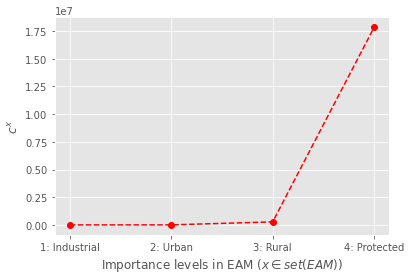

In [4]:

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(["1: Industrial","2: Urban","3: Rural","4: Protected"], 65**np.arange(1,5),'ro--')  # Plot some data on the axes.
ax.set_xlabel('Importance levels in EAM $(x \in {set(EAM)})$')  # Add an x-label to the axes.
ax.set_ylabel('$c^x$')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
ax.set_xticks([0,1,2,3])
plt.show()
fig.savefig('cx.eps', format='eps', dpi=100)


In [5]:
variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])


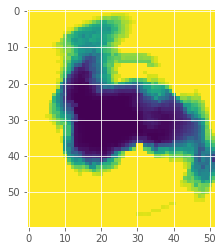

In [6]:
plt.imshow(variograms[700])


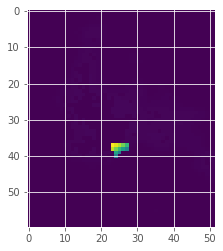

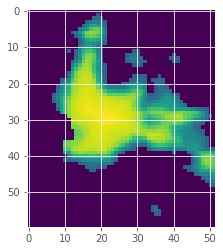

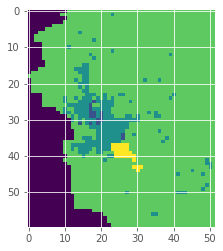

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(sensitivity)
fig.savefig('sensitivity.eps', format='eps', dpi=100)

fig, ax = plt.subplots()
ax.imshow(nonsat)
fig.savefig('NTLI.eps', format='eps', dpi=100)

fig, ax = plt.subplots()
ax.imshow(EAM)
fig.savefig('EAM.eps', format='eps', dpi=100)


In [8]:
plt.savefig('destination_path.eps', format='eps')

<Figure size 432x288 with 0 Axes>

In [22]:

for i in (it.product(np.arange(1,160,30))):print(i)

[1,30,60,90,120,150]

(1,)
(31,)
(61,)
(91,)
(121,)
(151,)


In [9]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [10]:
it.product(np.arange(1,17,3)*10,np.arange(1,7))
    

(1, 7)
 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
Search Space Boundaries: [[ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]]
 The best solution found:                                                                           
 [31. 38. 33. 31. 21. 14. 36. 25. 35. 15. 24. 27. 34. 37.]

 Objective function:
 -0.7587805762301716


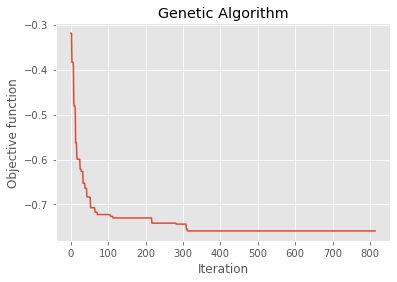

In [195]:
#sensitivity = ps.f5(NLTI,EAM,2)
from IPython.display import clear_output

r2 = list([])
results2 = list([])
n_sensors = 4

allc = [1]
alls = np.arange(1,8)
for i in it.product(allc,alls):
    clear_output(wait=False)
    c = i[0]
    n_sensors = i[1]
    print(i)
    
    
    sensitivity = ps.f5(NLTI,EAM,c)
    aptitude = netfit.NetworkFitness(NLTI,EAM,sensitivity,variograms,variograms_m,coords)
    aptitude.selectFitnessFunction("max")
    f = aptitude.f



    #variable ranges, 2 ranges per sensor position (dim*n_sensors) 
    varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
    print("Search Space Boundaries:", varbound)

    dim = len(varbound)

    #algorithms_parameters={'max_num_iteration': None, 'population_size': 500, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}

    model=ga(function=f,
             dimension=dim,
             algorithm_parameters={'max_num_iteration': 2000, 'population_size': 2000, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': 500},
             variable_type='int',
             variable_boundaries=varbound)

    
    
    model.run()
    r2.append(model.output_dict["function"])
    results2.append(model.output_dict["variable"])
    
    
    

In [196]:
results2

[array([35., 15.]),
 array([21., 14., 35., 15.]),
 array([35., 15., 31., 38., 21., 14.]),
 array([31., 38., 24., 27., 35., 15., 21., 14.]),
 array([24., 27., 35., 15., 21., 14., 31., 38., 33., 30.]),
 array([36., 25., 35., 15., 24., 27., 31., 38., 34., 35., 21., 14.]),
 array([31., 38., 33., 31., 21., 14., 36., 25., 35., 15., 24., 27., 34.,
        37.])]

In [106]:
results

[array([35., 15.]),
 array([35., 15., 21., 14.]),
 array([21., 14., 35., 15., 34., 37.]),
 array([24., 27., 35., 15., 31., 38., 21., 14.]),
 array([24., 27., 36., 25., 31., 38., 35., 15., 21., 14.]),
 array([34., 37., 23., 13., 31., 38., 24., 27., 35., 15., 33., 30.]),
 array([35., 15., 21., 14., 24., 27., 34., 28., 30., 38., 33., 38., 33.,
        31.]),
 array([36., 25.]),
 array([31., 38., 36., 25.]),
 array([23., 13., 36., 25., 31., 38.]),
 array([31., 38., 24., 27., 36., 25., 35., 15.]),
 array([36., 25., 31., 38., 31., 30., 35., 15., 21., 14.]),
 array([35., 15., 33., 31., 37., 24., 24., 27., 31., 38., 21., 14.]),
 array([36., 25., 24., 27., 33., 30., 35., 15., 31., 30., 21., 14., 31.,
        38.]),
 array([36., 25.]),
 array([31., 38., 36., 25.]),
 array([31., 38., 36., 25., 21., 14.]),
 array([31., 38., 24., 27., 21., 14., 36., 25.]),
 array([31., 30., 31., 38., 36., 25., 38., 25., 21., 14.]),
 array([15., 15., 36., 25., 35., 15., 31., 38., 21., 14., 24., 27.]),
 array([24., 2

In [3]:
#res_df= pd.DataFrame(results)
#res_df.to_csv("results_7x7.csv")
res_read = pd.read_csv("results_7x7.csv")

In [7]:
res_read.iloc[0][1:]

0     35.0
1     15.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
Name: 0, dtype: float64

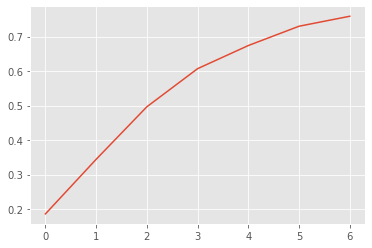

In [198]:
plt.plot([-aptitude.maximum(results2[i]) for i in range(0,7)])

In [186]:
allc

[1, 30, 60, 90, 120, 150, 180]

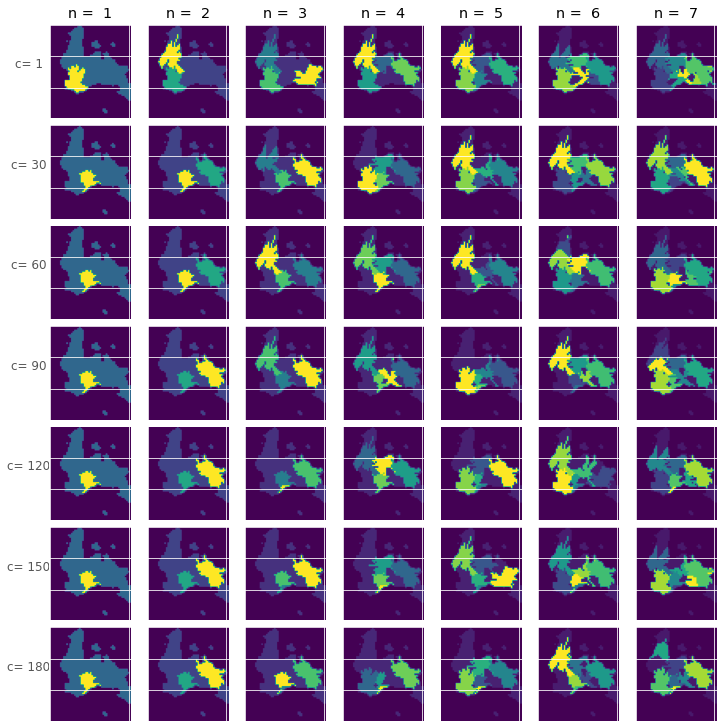

In [147]:


fig, axs = plt.subplots(ncols=7, nrows=7, figsize=(10, 10),
                        constrained_layout=True)
# add an artist, in this case a nice label in the middle...
ix = 0
#cs = [1,30,60,90,120,150]
for row in range(len(allc)):
    for col in range(7):
        R = aptitude.project(results[ix])+(nonsat>0)/2
        #R_and_locations = AttachLocations(R,results)
        axs[row,col].imshow(R)
        
        if col==0: 
            axs[row, col].set_ylabel("c={c: 1.0f}".format(c = allc[row]),rotation = 0)
            axs[row, col].yaxis.set_label_coords(-.25, .5)
        if row==0: 
            axs[row, col].set_title('n = {n: 1.0f}'.format(n=col+1))
            #axs[row, col].set_xlabel("n = {n: 1.0f}".format(n=col+1))
            
        axs[row, col].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

        ix += 1
    

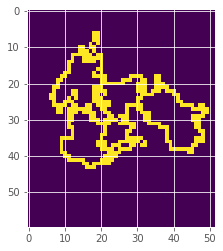

In [37]:
from skimage import filters

im = aptitude.project(results[35])

edge_sobel = filters.roberts(im)


plt.imshow(edge_sobel>0)


In [187]:
allc

[1, 30, 60, 90, 120, 150, 180]

In [ ]:



ax.plot(np.arange(1,7),-np.array(r2),"-o")
ax.set_xlabel("Number of sensors optimally allocated")
ax.set_ylabel("Percentage of weighted \n representativity of $S$ ")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


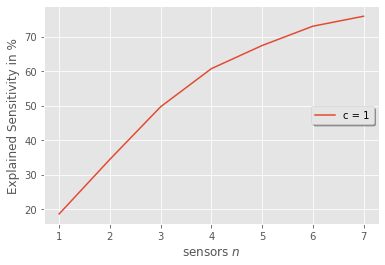

In [211]:
fig, ax = plt.subplots()
for cix in range(0,1):
    ax.plot([1,2,3,4,5,6,7],[-aptitude.maximum(results2[i])*100 for i in range(cix*7,cix*7+7)])
    
ax.legend(("c = 1","c = 2"),
           loc='right', shadow=True)
ax.set_xlabel("sensors $n$")
ax.set_ylabel("Explained Sensitivity in %")

fig.savefig('explaineds1.eps', format='eps', dpi=100)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


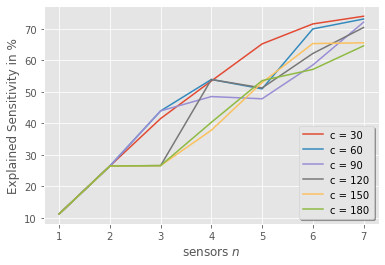

In [212]:
fig, ax = plt.subplots()
for cix in range(1,7):
    ax.plot([1,2,3,4,5,6,7],[-aptitude.maximum(results[i])*100 for i in range(cix*7,cix*7+7)])
    
ax.legend(('c = 30', 'c = 60','c = 90','c = 120','c = 150','c = 180'),
           loc='lower right', shadow=True)
ax.set_xlabel("sensors $n$")
ax.set_ylabel("Explained Sensitivity in %")

fig.savefig('explaineds2to7.eps', format='eps', dpi=100)

In [514]:
def projectResults(X,EAM,NLTI):
    
    NLTIC = np.copy(NLTI)
    EAMC = np.copy(EAM)
    
    n_sensors = int(len(X)/2)
    sensor_list = X.reshape(n_sensors,len(NLTI.shape))
    
    geopos = np.zeros(NLTI.shape)
    positions = np.zeros(NLTI.shape)
    
    for s in sensor_list:
        positions[(int(s[0]),int(s[1])) ] = 1
        NLTIC[(int(s[0]),int(s[1])) ] = 0
        geopos[(int(s[0]),int(s[1])) ] = 0
        EAMC[(int(s[0]),int(s[1])) ] = 0
        
    return NLTIC

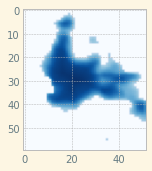

In [499]:
NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
NLTI = (NLTI>=22)*NLTI

plt.imshow(NLTI)

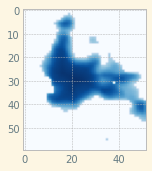

In [498]:
plt.imshow(projectResults(results[0],EAM,NLTI))




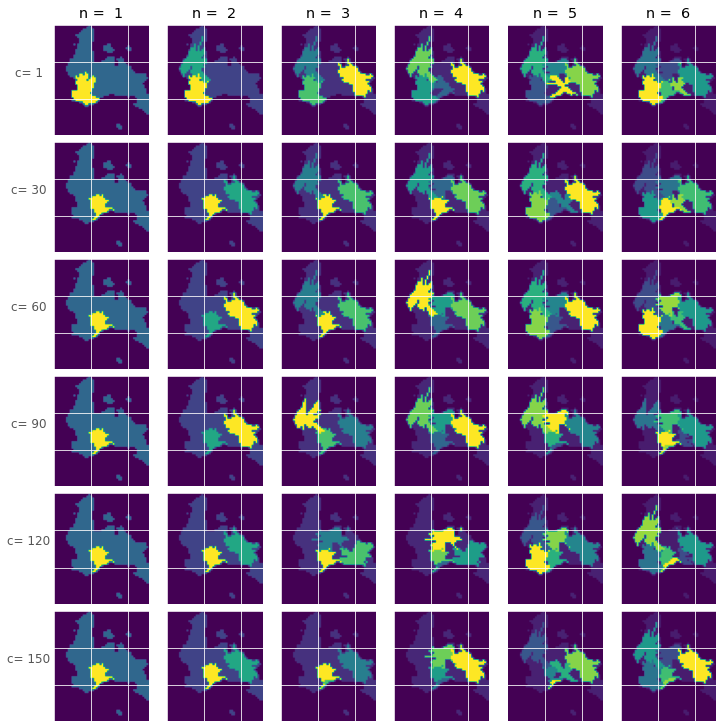

In [26]:
fig.savefig('ResultsVaryingCandN.eps', format='eps', dpi=300)


### plt.plot(np.arange(1,len(r2)+1),-np.array(r2)*100,"-o")
plt.show()

In [115]:
from scipy.optimize import differential_evolution,rosen

bounds = [tuple((0,nonsat.shape[0])),tuple((0,nonsat.shape[1]))]*n_sensors
print(bounds)
result = differential_evolution(f, bounds,popsize=500,polish=False,maxiter=100,strategy= "rand1bin")
result.x, result.fun


[(0, 60), (0, 52)]


(array([14.15678617,  5.42205097]), -0.0)

In [114]:
bounds = [(0,2), (0, 2), (0, 2), (0, 2), (0, 2)]
result = differential_evolution(rosen, bounds,polish=False,strategy= "rand1bin")
result.x, result.fun

(array([1., 1., 1., 1., 1.]), 9.530690930322059e-20)

In [110]:
f(result.x)

-0.0

In [93]:
f(X_opt)

-0.0

In [76]:
bounds = [(-5, 5), (-5, 5)]
bounds

[(-5, 5), (-5, 5)]

In [122]:
f([0.3,0.3,0.3,0.3])


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/rodrigo/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-122-11968a45fdf8>", line 1, in <cell line: 1>
    f([0.3,0.3,0.3,0.3])
  File "/Users/rodrigo/Documents/SourcesCodes/optimal_light_sensor_location/network_fitness.py", line 193, in maximum
    M = self.coverage2(X)
  File "/Users/rodrigo/Documents/SourcesCodes/optimal_light_sensor_location/network_fitness.py", line 128, in coverage2
    sensor_list = X.reshape(n_sensors,len(self.NLTI.shape))
AttributeError: 'list' object has no attribute 'reshape'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rodrigo/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceb

In [402]:
results_to_9 = pd.DataFrame(r2)
results_to_9.to_csv("results_to_9.csv")

In [405]:
position_results = pd.DataFrame(results)
position_results.to_csv("position_results_9.csv")

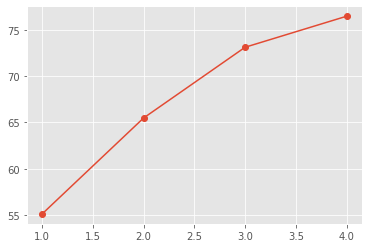

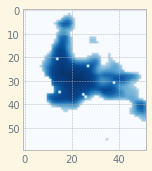

In [417]:
plt.imshow(NLTI)

array([38., 25., 36., 25., 21., 14., 34., 35., 24., 27., 31., 38.])

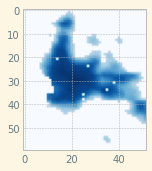

In [462]:


X = results[-1]

plt.imshow(projectResults(X,np.copy(EAM),np.copy(nonsat)))

r: 0
[31. 38.]


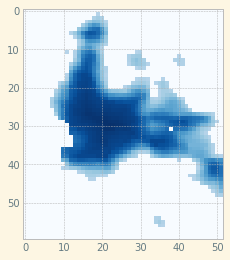

r: 1
[31. 38. 36. 25.]


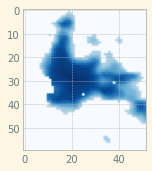

r: 2
[36. 25.]


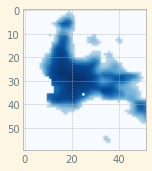

r: 3
[36. 25. 31. 38.]


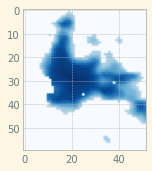

In [403]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(ncols=6, nrows=6)

for i in np.arange(0,len(results)):
    print("r:",i)
    
    

    X = results[i]
    print(X)
    n_sensors = int(len(X)/2)
    sensor_list = X.reshape(n_sensors,len(NLTI.shape))
    geopos = np.zeros(NLTI.shape)
    geopos_EAM = np.zeros(NLTI.shape)
    positions = np.zeros(NLTI.shape)

    #EAM: Environtmental attention map is the importance
    EAM = ps.readIMG(niveles,invert=True)
    M = np.copy(nonsat)
    

    geopos_EAM = EAM 

    for s in sensor_list:
        positions[(int(s[0]),int(s[1])) ] = 1
        M[(int(s[0]),int(s[1])) ] = 0
        geopos[(int(s[0]),int(s[1])) ] = 0
        geopos_EAM[(int(s[0]),int(s[1])) ] = 0
        
 #   ax0 = fig.add_subplot(spec[int(i/6), i%6])
        
    


    plt.style.use("bmh")
    plt.imshow(M)
    plt.show()


In [373]:
import matplotlib.pyplot as plt
import numpy as np


# add an artist, in this case a nice label in the middle...
for row in range(6):
    for col in range(6):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
        axs[row, col].imshow(M)
fig.suptitle('plt.subplots()')


Text(0.5, 0.98, 'plt.subplots()')

   def maximum(self,X):
        """
        
        
        """
    
        M = self.coverage2(X)
        #creamos n mapas de cobertutura de cada sensor   
        
        return -np.sum(np.max(M,axis=0))

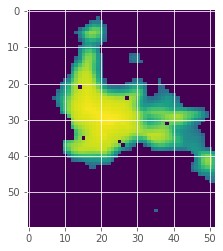

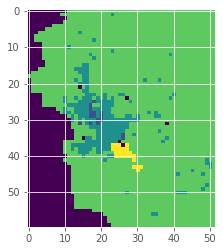

In [354]:
i = 0
    
X = results[i]

n_sensors = int(len(X)/2)

sensor_list = X.reshape(n_sensors,len(NLTI.shape))
geopos = np.zeros(NLTI.shape)
geopos_EAM = np.zeros(NLTI.shape)
geopos = NLTI
geopos_EAM = EAM

positions = np.zeros(NLTI.shape)

for s in sensor_list:
    positions[(int(s[0]),int(s[1])) ] = 1
    geopos[(int(s[0]),int(s[1])) ] = 0
    geopos_EAM[(int(s[0]),int(s[1])) ] = 0
    

plt.imshow(geopos)
plt.show()
plt.imshow(geopos_EAM)
plt.show()

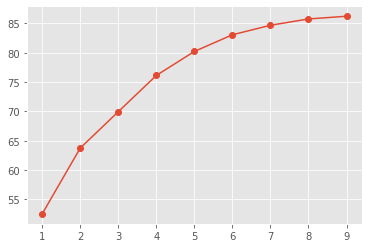

In [361]:
#plt.plot(-np.array(r2)*100)



In [576]:
IMGP = aptitude.coverage2(results[-1])



In [578]:
def project(X):
    
    IMGP = aptitude.coverage2(X)
    
    
    dummy = np.ones(nonsat.shape)*-1
    R = np.zeros((len(IMGP)+1,nonsat.shape[0],nonsat.shape[1] ))
    R[0]= dummy
    
    for i in range(1,len(R)):
        outofrange = (IMGP[i-1]==0)*-1
        inrange = (IMGP[i-1]!=0)*IMGP[i-1]
        R[i]= outofrange+inrange
    
    return np.argmax(R,axis=0)*(nonsat>0)
    
    
    
    
    
    

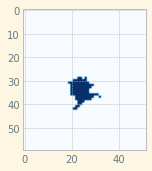

In [585]:
plt.imshow(project(results[-6]))

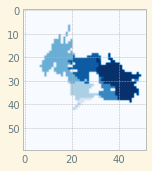

In [591]:



dummy = np.ones(nonsat.shape)*-1

R = np.zeros((len(IMGP)+1,nonsat.shape[0],nonsat.shape[1] ))
R[0]= dummy

for i in range(1,len(R)):
    outofrange = (IMGP[i-1]==0)*-1
    inrange = (IMGP[i-1]!=0)*IMGP[i-1]
    R[i]= outofrange+inrange
   
coverRegions = np.argmax(R,axis=0)*(nonsat>0)
plt.imshow(coverRegions*(nonsat>0))
plt.show()

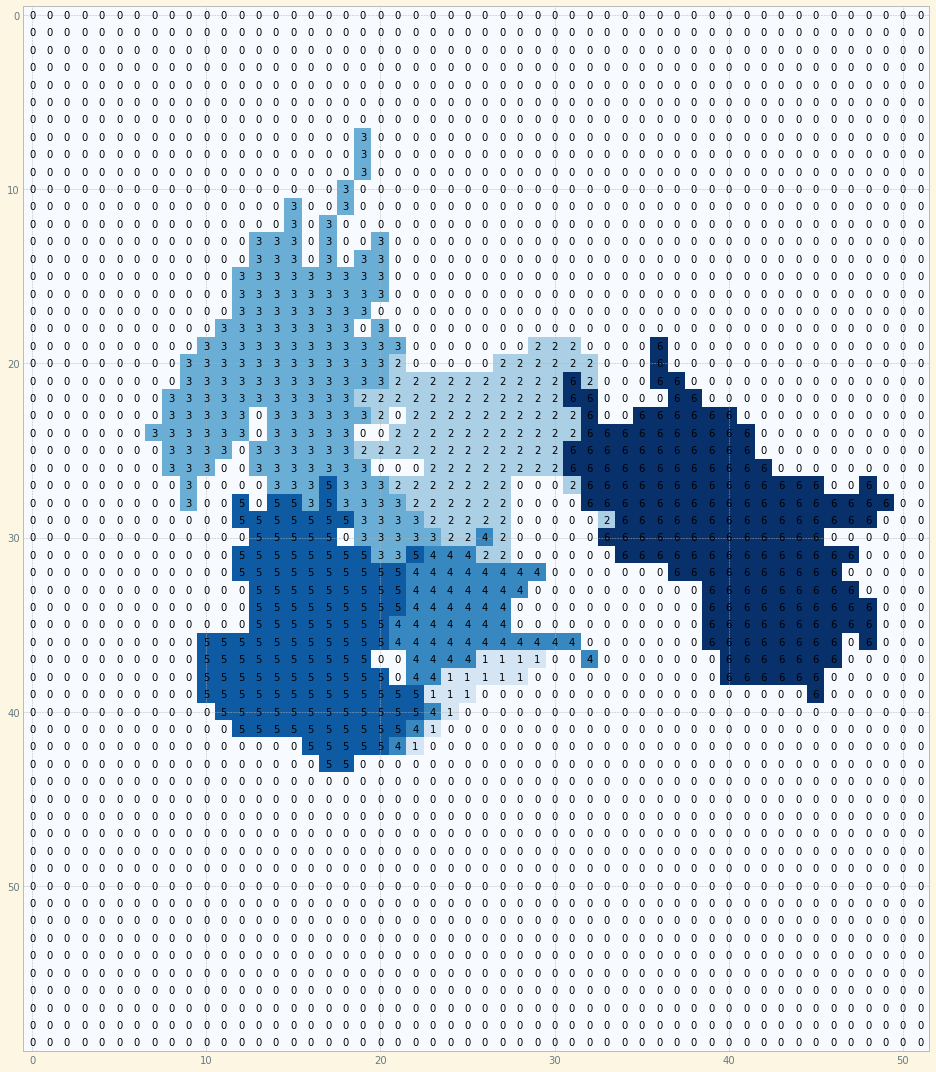

In [568]:

img = coverRegions*(nonsat>0)


fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(img)
for i in range((img.shape[0])):
    for j in range(img.shape[1]):
        text = ax.text(j, i, int(img[i, j]), ha="center", va="center", color="black")

#fig.title(np.sum(img))
fig.tight_layout()
plt.show()



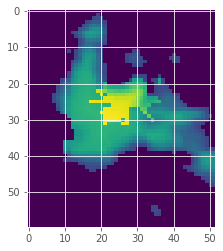

In [370]:
plt.imshow(1*(R[2]>0)*34+nonsat)

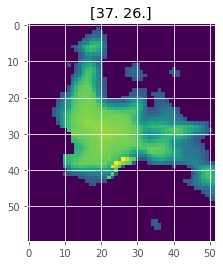

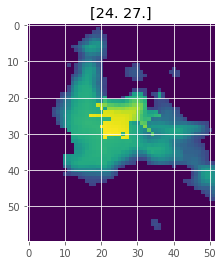

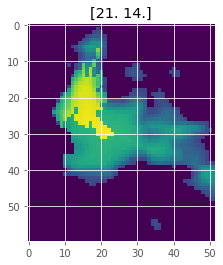

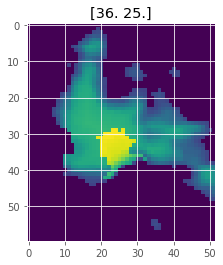

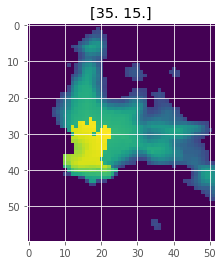

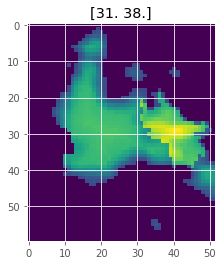

In [367]:
coverRegions = np.argmax(R,axis=0)*(nonsat>0)
for i in range(len(R)):
    if i>0:
        plt.title(str(sensor_list[i-1]))
        plt.imshow(1*(R[i]>0)*34+nonsat)
        plt.show()

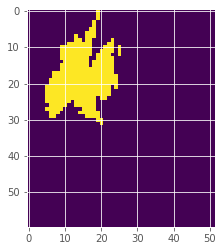

In [211]:
plt.imshow(IMGP[2]>0)

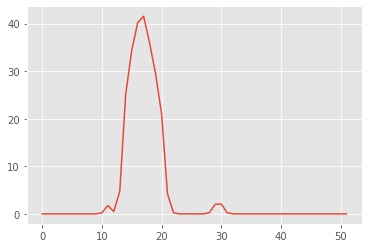

In [216]:
plt.plot(NLTI[10][:])

In [217]:
X

array([44., 48., 26., 27., 20., 15., 11., 16., 40., 24., 32., 16., 39.,
       17., 33., 27., 32., 38., 38., 24.])

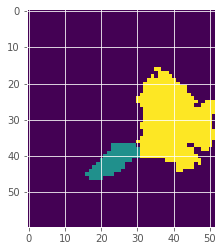

In [121]:
plt.imshow(np.argmax(IMGP,axis=0))

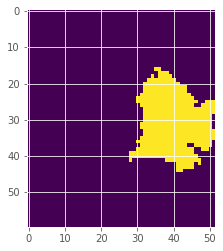

In [91]:
plt.imshow(IMGP[1]>0)
#plt.imshow(IMGP)
#plt.show()

# Checking the cause of discontinuities

[53]
0.0


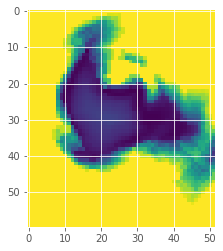

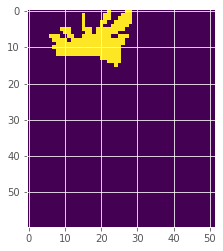

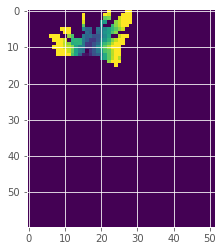

In [238]:
# test coordinates 11,16
sy = 11 
sx = 16

ix = aptitude.validate_coordinates(sy,sx)

tvar = variograms[ix][0]
tvar_m = variograms_m[ix][0]

print(ix)
print(tvar[(sy,sx)])

plt.imshow(tvar)
plt.show()

plt.imshow(tvar_m)
plt.show()

plt.imshow(tvar_m*tvar)
plt.show()

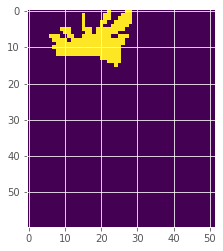

In [250]:
sy = 11
sx = 16

ix = aptitude.validate_coordinates(sy,sx)
coordinates = aptitude.coordinates[ix][0]
pi = aptitude.NLTI[(sy,sx)]
tvar = aptitude.local_variograms[ix][0]

tvar_m = aptitude.local_variograms_m[ix][0]

plt.imshow(tvar_m)

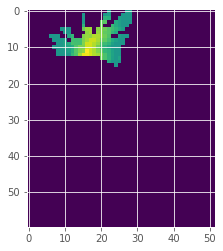

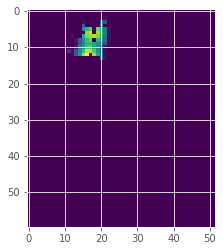

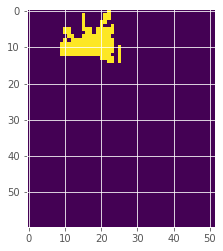

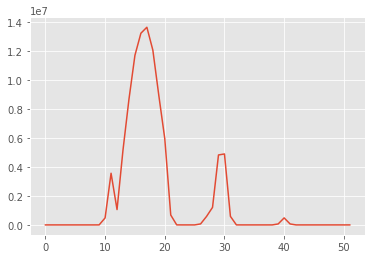

In [265]:
outofrange = (tvar_m==0)*(np.max(aptitude.NLTI)**2/2)
inrange = (tvar_m==1)*tvar

M = inrange+outofrange

lb = (np.max(aptitude.NLTI))**2/2
map0to1 = (lb-M)/(lb)

plt.imshow(map0to1)
plt.show()


plt.imshow(map0to1*aptitude.sensitivity)
plt.show()

plt.imshow(map0to1*aptitude.sensitivity>0)
plt.show()

plt.plot(aptitude.sensitivity[11][:])
plt.show()



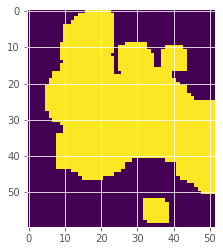

In [269]:
plt.imshow((NLTI)>0)

In [80]:
M = aptitude.coverage2(X[:4])

M2 = np.argmax(M,axis=0)

#plt.imshow(np.argmax(M,axis=0)+(IMGP>0)*5)

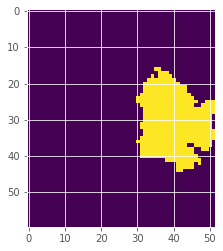

In [83]:
plt.imshow(M2)

In [175]:
sensor_list = X.reshape(n_sensors,2) 


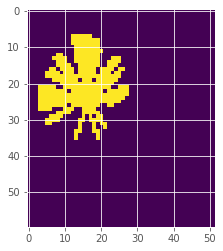

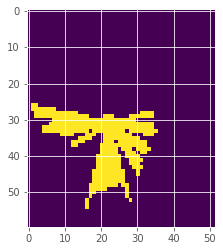

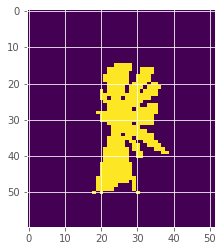

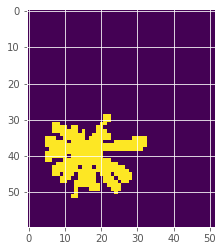

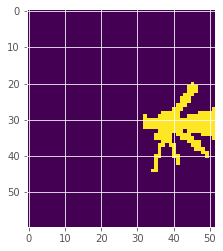

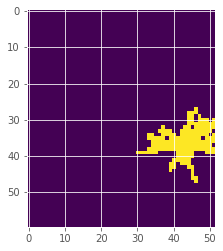

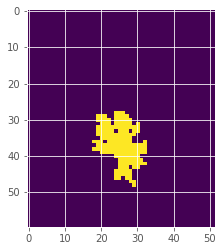

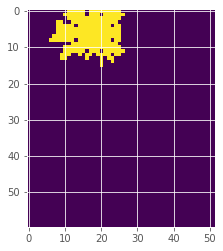

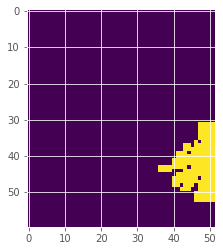

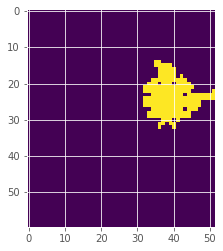

In [176]:
zeros = np.zeros(NLTI.shape)
for i in sensor_list:    
    ix = aptitude.validate_coordinates(i[0],i[1])
        
    cover = aptitude.local_variograms[ix]
    plt.imshow(cover[0]>0)
    zeros += cover[0]>0
    plt.show()


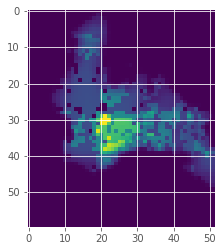

In [179]:
plt.imshow((zeros)*NLTI)

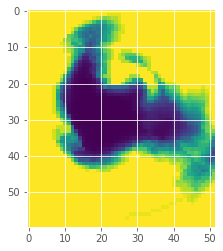

In [335]:
ix = aptitude.validate_coordinates(30,25)
cover = aptitude.local_variograms[ix]

plt.imshow(cover[0])

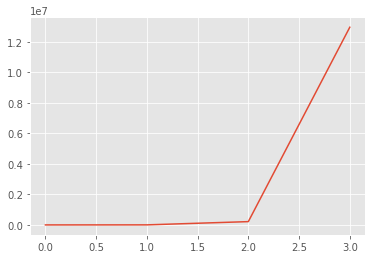

In [114]:
V = np.arange(1,5)
c=60
plt.plot(c**V)

In [115]:
c**V

array([      60,     3600,   216000, 12960000])

In [10]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

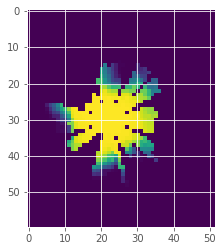

In [16]:
ix = aptitude.validate_coordinates(30,22)
coverage = np.zeros(aptitude.NLTI.shape)
coordinates = aptitude.coordinates[ix][0]
pi = aptitude.NLTI[coordinates[0]][coordinates[1]]
tvar = aptitude.local_variograms[ix][0]

outofrange = (tvar==0)*(np.max(NLTI)**2/2)
tvar[coordinates[0]][coordinates[1]]=0

lb = (np.max(NLTI))**2/2

M = tvar+outofrange


W = (-M+lb)/lb
plt.imshow(W)




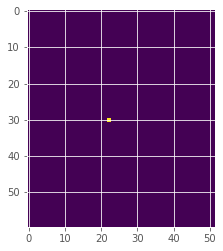

In [21]:
plt.imshow(W==1)

In [ ]:
plt.imshow(tvar==0)

tvar[tvar==0]=np.max(aptitude.NLTI)**2/2

1503039.3495531052


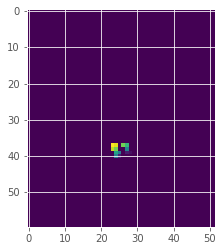

In [12]:
tvar_norm = NormalizeData(tvar)


plt.imshow(((-tvar_norm+1)>0)*sensitivity)
print(np.sum(((-tvar_norm+1)>0)*sensitivity))

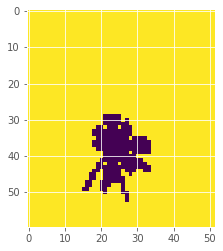

In [13]:
ix = aptitude.validate_coordinates(37,23)
coverage = np.zeros(aptitude.NLTI.shape)
coordinates = aptitude.coordinates[ix][0]
pi = aptitude.NLTI[coordinates[0]][coordinates[1]]
tvar = aptitude.local_variograms[ix][0]
plt.imshow(tvar==0)

tvar[tvar==0]=np.max(aptitude.NLTI)**2/2


1951073.2221549335


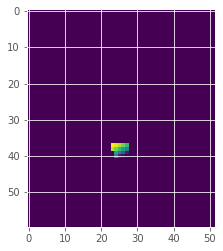

In [131]:
tvar_norm = NormalizeData(tvar)


plt.imshow(((-tvar_norm+1)>0)*sensitivity)
print(np.sum(((-tvar_norm+1)>0)*sensitivity))

In [83]:
ix = (37,23)

coverage = np.zeros(aptitude.NLTI.shape)
coordinates = aptitude.coordinates[ix][0]
pi = aptitude.NLTI[coordinates[0]][coordinates[1]]
tvar = aptitude.local_variograms[ix][0]
plt.imshow(tvar==0)

tvar[tvar==0]=np.max(aptitude.NLTI)**2/2

3041425.089341979

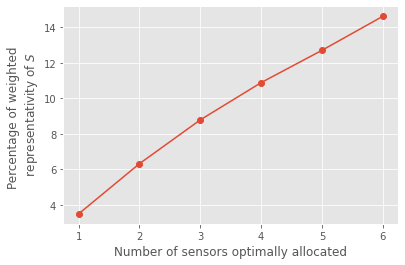

In [49]:
plt.plot(np.arange(1,7),-np.array(r2),"-o")
plt.xlabel("Number of sensors optimally allocated")
plt.ylabel("Percentage of weighted \n representativity of $S$ ")
plt.show()






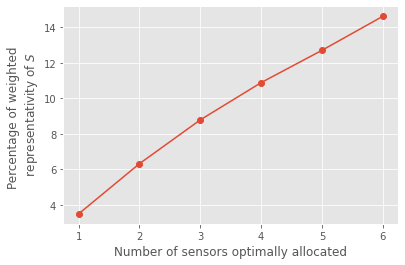

In [57]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,7),-np.array(r2),"-o")
ax.set_xlabel("Number of sensors optimally allocated")
ax.set_ylabel("Percentage of weighted \n representativity of $S$ ")

fig.savefig('wrepresentativity.eps', format='eps', dpi=100)



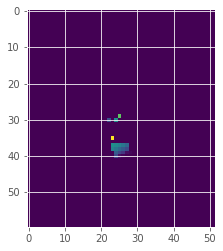

In [141]:
X = model.output_dict["variable"]
X = results[3]
P = aptitude.showPositions(X)
plt.imshow(P*np.max(sensitivity)/2+sensitivity)
plt.show()

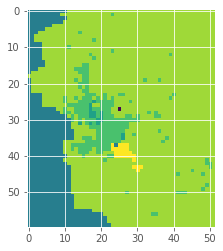

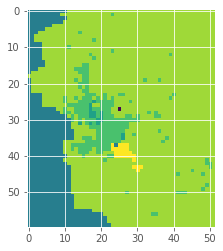

In [13]:
EAM = ps.readIMG(niveles,invert=True)
plt.imshow( (1-P)*EAM )



fig, ax = plt.subplots()
ax.imshow( (1-P)*EAM)
fig.savefig('result_over_EAM.eps', format='eps', dpi=100)


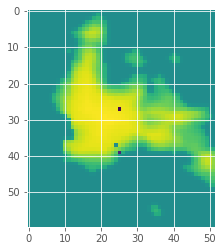

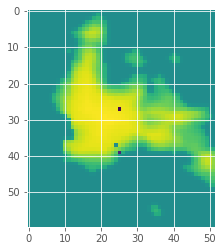

In [121]:
NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
plt.imshow( (1-P)*NLTI )


fig, ax = plt.subplots()
ax.imshow((1-P)*NLTI)
fig.savefig('result_over_NLTI.eps', format='eps', dpi=100)

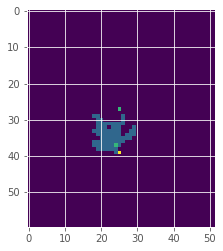

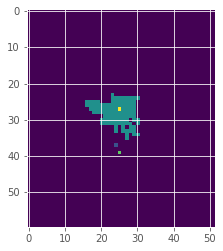

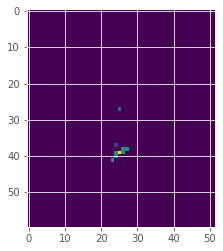

In [122]:
cover = np.zeros(NLTI.shape)
for i in range(n_sensors):
    cover = ((aptitude.coverage(X)[i]>0))*(i+1)
    
    fig, ax = plt.subplots()
    ax.imshow(cover+P)
    fig.savefig('roi_'+str(i)+'.eps', format='eps', dpi=100)


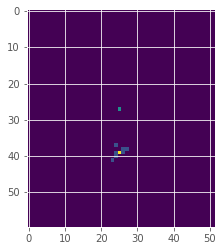

In [123]:
plt.imshow(1*(cover>0)+P)

In [124]:
EAM[X[0]][X[1]]=0
EAM[X[2]][X[3]]=0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
y = int(X[0])
x = int(X[1])
EAM[y][x] = 0

In [ ]:



fig, ax = plt.subplots()
ax.imshow(EAM)
fig.savefig('res01_example.eps', format='eps', dpi=100)

In [ ]:
cover = (NLTI*(aptitude.coverage(X)[0]>0))

cover[y][x]=80
plt.imshow((cover>0)*EAM)


fig, ax = plt.subplots()
ax.imshow((cover>0)*EAM)
fig.savefig('res01_example_b.eps', format='eps', dpi=100)

In [ ]:
NLTI[y][x]=0
plt.imshow((cover>0)*NLTI)




fig, ax = plt.subplots()
ax.imshow((cover>0)*NLTI)
fig.savefig('res01_example_c.eps', format='eps', dpi=100)

In [ ]:
C = aptitude.coverage(X)

In [ ]:
plt.imshow(C[0])

13.956670759565526


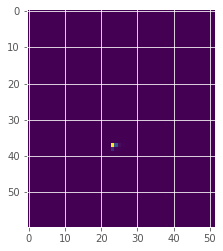

In [8]:
def explicability(X,S):
    n_sensors = int(len(X)/2)
    sensor_list = X.reshape(n_sensors,len(S.shape))
    
    coverage = np.zeros((n_sensors,S.shape[0],S.shape[1]))
    
    for i,s in enumerate(sensor_list):
        
        sy,sx = s[0],s[1]
        
        ix = aptitude.validate_coordinates(sy,sx)
        coverage[i] = np.zeros(S.shape)
        
        v = aptitude.local_variograms[ix]
        M = v>0
        if len(ix)>0: 
            
            map0to1 = 1/(1+v) 
            coverage[i] = map0to1*M
    

    return coverage

E = explicability(X,sensitivity)
T = np.sum(sensitivity)

C = np.max(E,axis=0)*sensitivity

plt.imshow(np.max(E,axis=0)*sensitivity)

print(100*np.sum(C)/T)





In [ ]:
X

In [24]:
ix = aptitude.validate_coordinates(39,25)

In [26]:
v = aptitude.local_variograms[ix]

In [47]:
(v[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

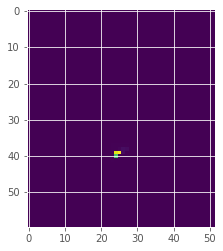

In [64]:
M= v[0]>0
P = 1/(1+v[0])
plt.imshow(P*M*sensitivity) 

In [66]:
np.sum(sensitivity)

140466114.26891884

In [73]:
T = np.sum(sensitivity)

In [78]:
(np.sum(P*M*sensitivity)/T)*100

2.6077766589682474

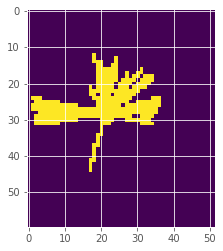

In [75]:
v = variograms[800]



plt.imshow(v>0)

In [15]:
r2

[-2005299.319098516]

In [243]:
X = results[0]
n_sensors = int(len(X)/2)
sensor_list = X.reshape(n_sensors,len(NLTI.shape))
coverage = np.zeros((n_sensors,NLTI.shape[0],NLTI.shape[1]))
for i,s in enumerate(sensor_list):
    sy,sx = s[0],s[1]
    ix = aptitude.validate_coordinates(sy,sx)

    coverage[i] = np.zeros(NLTI.shape)
    if len(ix)>0:
        coordinates = aptitude.coordinates[ix][0]
        tvar = aptitude.local_variograms[ix][0]
        nltirange = np.max(NLTI)/2
        outofrange = (tvar==0)*(nltirange**2/2)
        tvar[coordinates[0]][coordinates[1]]=0
        M = tvar+outofrange
        
        

In [40]:
pi

60.077532628977366

In [242]:
results

[array([33., 37.]),
 array([33., 37., 20., 15.]),
 array([36., 19., 33., 37., 20., 15.]),
 array([34., 24., 26., 27., 20., 15., 33., 37.]),
 array([33., 27., 33., 37., 32., 16., 25., 25., 20., 15.]),
 array([33., 37., 36., 19., 20., 15., 33., 27., 26., 27.,  9., 17.]),
 array([33., 27.]),
 array([33., 37., 33., 27.]),
 array([33., 27., 33., 37., 20., 15.]),
 array([33., 27., 33., 37., 20., 15., 26., 27.]),
 array([20., 15., 26., 27., 33., 27., 33., 37., 36., 18.]),
 array([33., 42., 33., 27., 32., 16., 20., 15., 25., 25., 33., 37.]),
 array([33., 27.]),
 array([33., 37., 33., 27.]),
 array([33., 37., 20., 15., 33., 27.]),
 array([33., 37., 34., 24., 20., 15., 26., 27.]),
 array([23., 29., 20., 15., 32., 16., 32., 38., 33., 27.]),
 array([33., 37., 35., 23., 25., 25.,  9., 17., 27., 13., 20., 15.]),
 array([33., 27.]),
 array([33., 37., 33., 27.]),
 array([33., 27., 20., 15., 33., 37.]),
 array([25., 25., 33., 37., 33., 27., 20., 15.]),
 array([35., 17., 28., 28., 32., 38., 22., 14., 34

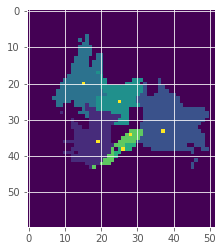

In [264]:

X = results[-1]
IMGP = aptitude.coverage2(X)


dummy = np.ones(nonsat.shape)*-1

R = np.zeros((len(IMGP)+1,nonsat.shape[0],nonsat.shape[1] ))
R[0]= np.copy(dummy)

for i in range(1,len(R)):
    outofrange = (IMGP[i-1]==0)*-1
    inrange = (IMGP[i-1]!=0)*IMGP[i-1]
    R[i]= outofrange+inrange
    
coverRegions = np.argmax(R,axis=0)*(nonsat>0)
C = coverRegions*(nonsat>0)


n_sensors = int(len(X)/2)
        
#get the coordinate sensor list
sensor_list = X.reshape(n_sensors,len(NLTI.shape))

for c in sensor_list:
    print
    C[tuple(c.astype(int))]=8

plt.imshow(C)
plt.show()

In [262]:
aptitude.local_variograms[ix]

array([[[1726.42290828, 1726.42290828, 1726.42290828, ...,
         1726.42290828, 1726.42290828, 1726.42290828],
        [1726.42290828, 1726.42290828, 1726.42290828, ...,
         1726.42290828, 1726.42290828, 1726.42290828],
        [1726.42290828, 1726.42290828, 1726.42290828, ...,
         1726.42290828, 1726.42290828, 1726.42290828],
        ...,
        [1726.42290828, 1726.42290828, 1726.42290828, ...,
         1726.42290828, 1726.42290828, 1726.42290828],
        [1726.42290828, 1726.42290828, 1726.42290828, ...,
         1726.42290828, 1726.42290828, 1726.42290828],
        [1726.42290828, 1726.42290828, 1726.42290828, ...,
         1726.42290828, 1726.42290828, 1726.42290828]]])

array([36., 19., 33., 37., 20., 15., 25., 25., 38., 26., 34., 28.])

[34. 28.]


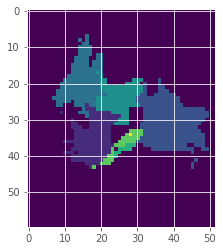

In [322]:
X = results[-1]
IMGP = aptitude.coverage2(X)


dummy = np.ones(nonsat.shape)*-1

R = np.zeros((len(IMGP)+1,nonsat.shape[0],nonsat.shape[1] ))
R[0]= np.copy(dummy)

for i in range(1,len(R)):
    outofrange = (IMGP[i-1]==0)*-1
    inrange = (IMGP[i-1]!=0)*IMGP[i-1]
    R[i]= outofrange+inrange
    
coverRegions = np.argmax(R,axis=0)*(nonsat>0)
C = coverRegions*(nonsat>0)


n_sensors = int(len(X)/2)
        
#get the coordinate sensor list
sensor_list = X.reshape(n_sensors,len(NLTI.shape))

for c in [sensor_list[-1]]:
    print(c)

    C[tuple(c.astype(int))]=8

plt.imshow(C)
plt.show()

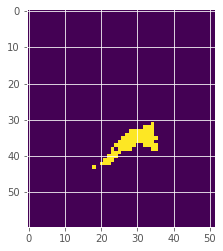

In [293]:
plt.imshow(R[6]>0)

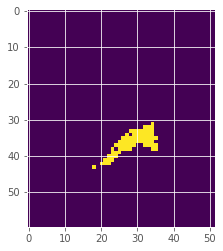

In [318]:
L = (R[6]>0)
L[tuple(sensor_list[5].astype(int))]=0
plt.imshow(L)

In [326]:
sensor_list[5]

array([34., 28.])

In [332]:

ix = aptitude.validate_coordinates(34,28)
v = aptitude.local_variograms[ix]



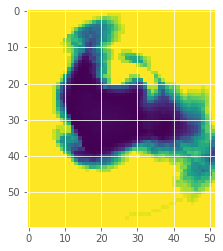

In [333]:
plt.imshow(v[0])

0.0

In [ ]:
#https://www.aspexit.com/variogram-and-spatial-autocorrelation/
#https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html